In [3]:

# Professional ML Pipeline with Advanced Techniques
# Classification & Regression Models Comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, auc,
                           mean_squared_error, r2_score, mean_absolute_error)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("PROFESSIONAL ML PIPELINE - CLASSIFICATION & REGRESSION")
print("=" * 80)

PROFESSIONAL ML PIPELINE - CLASSIFICATION & REGRESSION


In [ ]:
print("\n CLASSIFICATION TASK: Binary Classification with Imbalanced Data\n")


 CLASSIFICATION TASK: Binary Classification with Imbalanced Data



In [ ]:
X_class, y_class = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.7, 0.3],  # Imbalanced dataset
    flip_y=0.05,
    random_state=42
)

In [ ]:
X_class

array([[ 4.04711997, -1.16180627, -1.97336077, ..., -4.36752603,
         2.59080678,  0.87133139],
       [ 4.52197898, -2.56596759,  0.58922009, ..., -3.63405839,
         3.06894586, -3.50123555],
       [ 1.06231029, -1.0486413 ,  3.56747055, ...,  5.22664462,
        -0.08811888, -3.52982951],
       ...,
       [-2.46449884,  0.62837072,  3.2749506 , ...,  5.31206913,
        -0.62839268, -3.53256426],
       [ 4.26255132, -2.1266744 , -6.27760881, ..., -4.46166923,
        -3.23545587, -2.73993962],
       [ 7.15951635, -1.34673598,  0.84258121, ..., -4.27692749,
        -0.5693984 ,  1.24819628]])

In [ ]:
print(y_class)

[0 1 0 ... 0 0 0]


In [ ]:
feature_names = [f'feature_{i}' for i in range(X_class.shape[1])]
df_class = pd.DataFrame(X_class, columns=feature_names)
df_class['target'] = y_class

In [ ]:
df_class

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,4.047120,-1.161806,-1.973361,1.394356,-0.383312,4.397381,-0.026464,3.214353,1.923835,0.876007,...,0.491685,-0.483243,8.057918,0.670144,-2.668069,-3.621761,-4.367526,2.590807,0.871331,0
1,4.521979,-2.565968,0.589220,-5.448237,-2.171061,-1.426247,-2.845851,1.180508,10.312120,-3.159466,...,-2.676799,-1.242475,2.922624,-2.452354,1.583803,3.523673,-3.634058,3.068946,-3.501236,1
2,1.062310,-1.048641,3.567471,-2.517781,2.946013,2.267817,-3.259692,-2.284147,2.829789,-2.672130,...,-1.537297,4.522844,2.223728,-2.151040,3.365238,4.399797,5.226645,-0.088119,-3.529830,0
3,-0.484793,-1.568627,-0.290568,-2.344851,-0.908613,0.476842,1.331110,-0.868484,4.117109,2.370960,...,-0.538047,0.346876,4.093578,-0.214820,-0.478461,-0.106320,-6.757111,0.704421,-2.090230,1
4,7.781556,-4.763420,0.274282,2.241061,-0.915579,-3.213910,-1.768813,-0.452921,4.131285,3.789719,...,-0.228261,1.151808,4.539142,-2.782372,0.354572,-3.267697,-11.953274,-5.341287,-2.554013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7.990782,4.569311,1.923521,1.553907,3.820615,-3.597782,-3.628865,2.815844,4.829003,-4.515073,...,-3.104814,-3.079146,-12.511592,-2.873677,1.186472,-1.182100,8.138656,-4.876481,-2.956325,0
1996,2.720441,-1.690138,-1.546469,2.025570,-3.009505,-3.643526,-2.750085,-1.973660,-6.349457,-0.871381,...,-1.826155,1.217465,0.386918,3.010941,-1.347046,-1.385371,1.515652,-3.828469,-3.451009,0
1997,-2.464499,0.628371,3.274951,-1.250343,1.353058,-0.476913,-3.940898,-1.515428,0.526172,-0.718665,...,0.428887,3.629902,4.795867,-0.601908,-0.700310,-0.996291,5.312069,-0.628393,-3.532564,0
1998,4.262551,-2.126674,-6.277609,0.347569,-4.482065,-0.116407,2.026121,2.083140,-7.570216,-1.819728,...,1.228774,2.718040,4.733137,5.672762,3.476146,-1.908260,-4.461669,-3.235456,-2.739940,0


In [ ]:
df_class.corr()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
feature_0,1.000000,-0.477265,0.231162,0.510364,0.082285,0.228604,-0.014520,0.465406,0.332492,-0.341474,...,-0.197747,-0.283083,0.266469,-0.272210,0.040228,0.342208,-0.272560,-0.228956,-0.302625,-0.287551
feature_1,-0.477265,1.000000,0.012990,-0.225383,0.116678,-0.174189,0.081181,-0.097237,-0.232231,-0.238237,...,-0.005761,-0.155574,-0.489380,0.241479,0.028884,-0.200789,0.594327,-0.056997,-0.070742,0.162273
feature_2,0.231162,0.012990,1.000000,0.051543,0.253506,-0.186894,0.068923,0.005761,0.468089,-0.156094,...,-0.107328,-0.303081,0.011517,-0.160550,0.296688,0.623189,0.204647,0.050742,0.002580,0.183761
feature_3,0.510364,-0.225383,0.051543,1.000000,0.197267,0.050822,-0.053940,0.244537,-0.207400,0.024984,...,0.173250,-0.026821,0.315210,0.051161,-0.078953,-0.133275,0.012431,-0.267617,0.046389,-0.358224
feature_4,0.082285,0.116678,0.253506,0.197267,1.000000,0.076643,-0.182946,-0.016028,0.284678,-0.037923,...,-0.105195,-0.127005,-0.376305,-0.162274,0.017028,0.016945,0.276417,-0.086796,-0.039129,-0.211279
feature_5,0.228604,-0.174189,-0.186894,0.050822,0.076643,1.000000,0.026121,0.011408,0.092420,-0.029070,...,-0.087961,-0.047741,0.283270,-0.012726,0.065607,0.143841,0.063120,0.344525,-0.095203,0.000433
feature_6,-0.014520,0.081181,0.068923,-0.053940,-0.182946,0.026121,1.000000,0.126857,-0.010914,0.149564,...,-0.062879,-0.066692,0.031322,0.131234,0.096701,0.307914,-0.344101,0.122572,0.111546,0.212119
feature_7,0.465406,-0.097237,0.005761,0.244537,-0.016028,0.011408,0.126857,1.000000,0.290442,-0.176049,...,0.163604,-0.134453,0.319996,0.028003,-0.050735,0.006244,-0.229319,0.014454,-0.069338,-0.213085
feature_8,0.332492,-0.232231,0.468089,-0.207400,0.284678,0.092420,-0.010914,0.290442,1.000000,0.187960,...,-0.367562,-0.558930,0.070273,-0.376753,0.327805,0.314211,-0.206032,0.305658,-0.121397,0.122309
feature_9,-0.341474,-0.238237,-0.156094,0.024984,-0.037923,-0.029070,0.149564,-0.176049,0.187960,1.000000,...,0.021610,0.157201,0.219289,-0.076051,-0.030690,-0.446619,-0.491304,0.002070,0.292608,0.182758


In [ ]:
print(f"Dataset shape: {df_class.shape}")
print(f"Class distribution:\n{df_class['target'].value_counts()}")
print(f"Class imbalance ratio: {df_class['target'].value_counts()[0] / df_class['target'].value_counts()[1]:.2f}:1")

Dataset shape: (2000, 21)
Class distribution:
target
0    1381
1     619
Name: count, dtype: int64
Class imbalance ratio: 2.23:1


In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [ ]:
X_train_c

array([[ -3.43532414,   3.56852792,  -1.75639174, ...,   6.5056658 ,
          1.2273315 ,   0.32376807],
       [  4.25280807,  -0.35080542,   0.64664981, ...,  -3.74744231,
         -0.28319345,   0.21895068],
       [ -1.55635469,  -0.78257939,   1.35283205, ...,   4.76528535,
         -1.86855882,   0.03863135],
       ...,
       [ -1.5307672 ,   0.51197054,  -2.25812454, ..., -11.51684036,
         -0.42701441,   1.84340796],
       [  2.23874825,   1.1028494 ,   0.83516126, ...,   3.38883635,
          2.21535512,   6.13684658],
       [ -3.30739431,   0.45664461,   1.31679914, ...,  -0.92882595,
          1.27148155,  -1.48064949]])

In [ ]:
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

In [ ]:
X_train_c_scaled

array([[-0.80120217,  1.67338328, -0.86572433, ...,  1.10318084,
         0.40853578,  0.38811701],
       [ 0.51676262,  0.12744216,  0.12631332, ..., -0.53415505,
        -0.18731316,  0.34462041],
       [-0.4790933 , -0.04286668,  0.4178436 , ...,  0.82525659,
        -0.81268402,  0.26979239],
       ...,
       [-0.47470687,  0.46775535, -1.0728526 , ..., -1.77486314,
        -0.24404547,  1.01872957],
       [ 0.17149541,  0.7008215 ,  0.20413572, ...,  0.60544916,
         0.79827633,  2.80039927],
       [-0.77927135,  0.4459326 ,  0.40296828, ..., -0.08404551,
         0.42595142, -0.36067118]])

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_c_scaled)

In [ ]:
X_train_pca.shape

(1600, 2)

In [ ]:
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42)
}

In [ ]:
print("\n" + "=" * 80)
print("CLASSIFICATION MODEL PERFORMANCE")
print("=" * 80)


CLASSIFICATION MODEL PERFORMANCE


In [ ]:
class_results = {}
for name, model in classification_models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_c_scaled, y_train_c, cv=5, scoring='roc_auc')

    # Train model
    model.fit(X_train_c_scaled, y_train_c)

    # Predictions
    y_pred = model.predict(X_test_c_scaled)
    y_pred_proba = model.predict_proba(X_test_c_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    accuracy = accuracy_score(y_test_c, y_pred)
    precision = precision_score(y_test_c, y_pred)
    recall = recall_score(y_test_c, y_pred)
    f1 = f1_score(y_test_c, y_pred)
    roc_auc = roc_auc_score(y_test_c, y_pred_proba) if y_pred_proba is not None else None

    class_results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"\n{name}:")
    print(f"  CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"  Accuracy:   {accuracy:.4f}")
    print(f"  Precision:  {precision:.4f}")
    print(f"  Recall:     {recall:.4f}")
    print(f"  F1-Score:   {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:    {roc_auc:.4f}")


Logistic Regression:
  CV ROC-AUC: 0.8625 (+/- 0.0120)
  Accuracy:   0.7775
  Precision:  0.6699
  Recall:     0.5565
  F1-Score:   0.6079
  ROC-AUC:    0.8689

Random Forest:
  CV ROC-AUC: 0.9245 (+/- 0.0144)
  Accuracy:   0.8850
  Precision:  0.9333
  Recall:     0.6774
  F1-Score:   0.7850
  ROC-AUC:    0.9461

XGBoost:
  CV ROC-AUC: 0.9332 (+/- 0.0111)
  Accuracy:   0.8975
  Precision:  0.8879
  Recall:     0.7661
  F1-Score:   0.8225
  ROC-AUC:    0.9564

SVM:
  CV ROC-AUC: 0.9450 (+/- 0.0187)
  Accuracy:   0.9375
  Precision:  0.9541
  Recall:     0.8387
  F1-Score:   0.8927
  ROC-AUC:    0.9753

Decision Tree:
  CV ROC-AUC: 0.7474 (+/- 0.0359)
  Accuracy:   0.7800
  Precision:  0.6698
  Recall:     0.5726
  F1-Score:   0.6174
  ROC-AUC:    0.6921


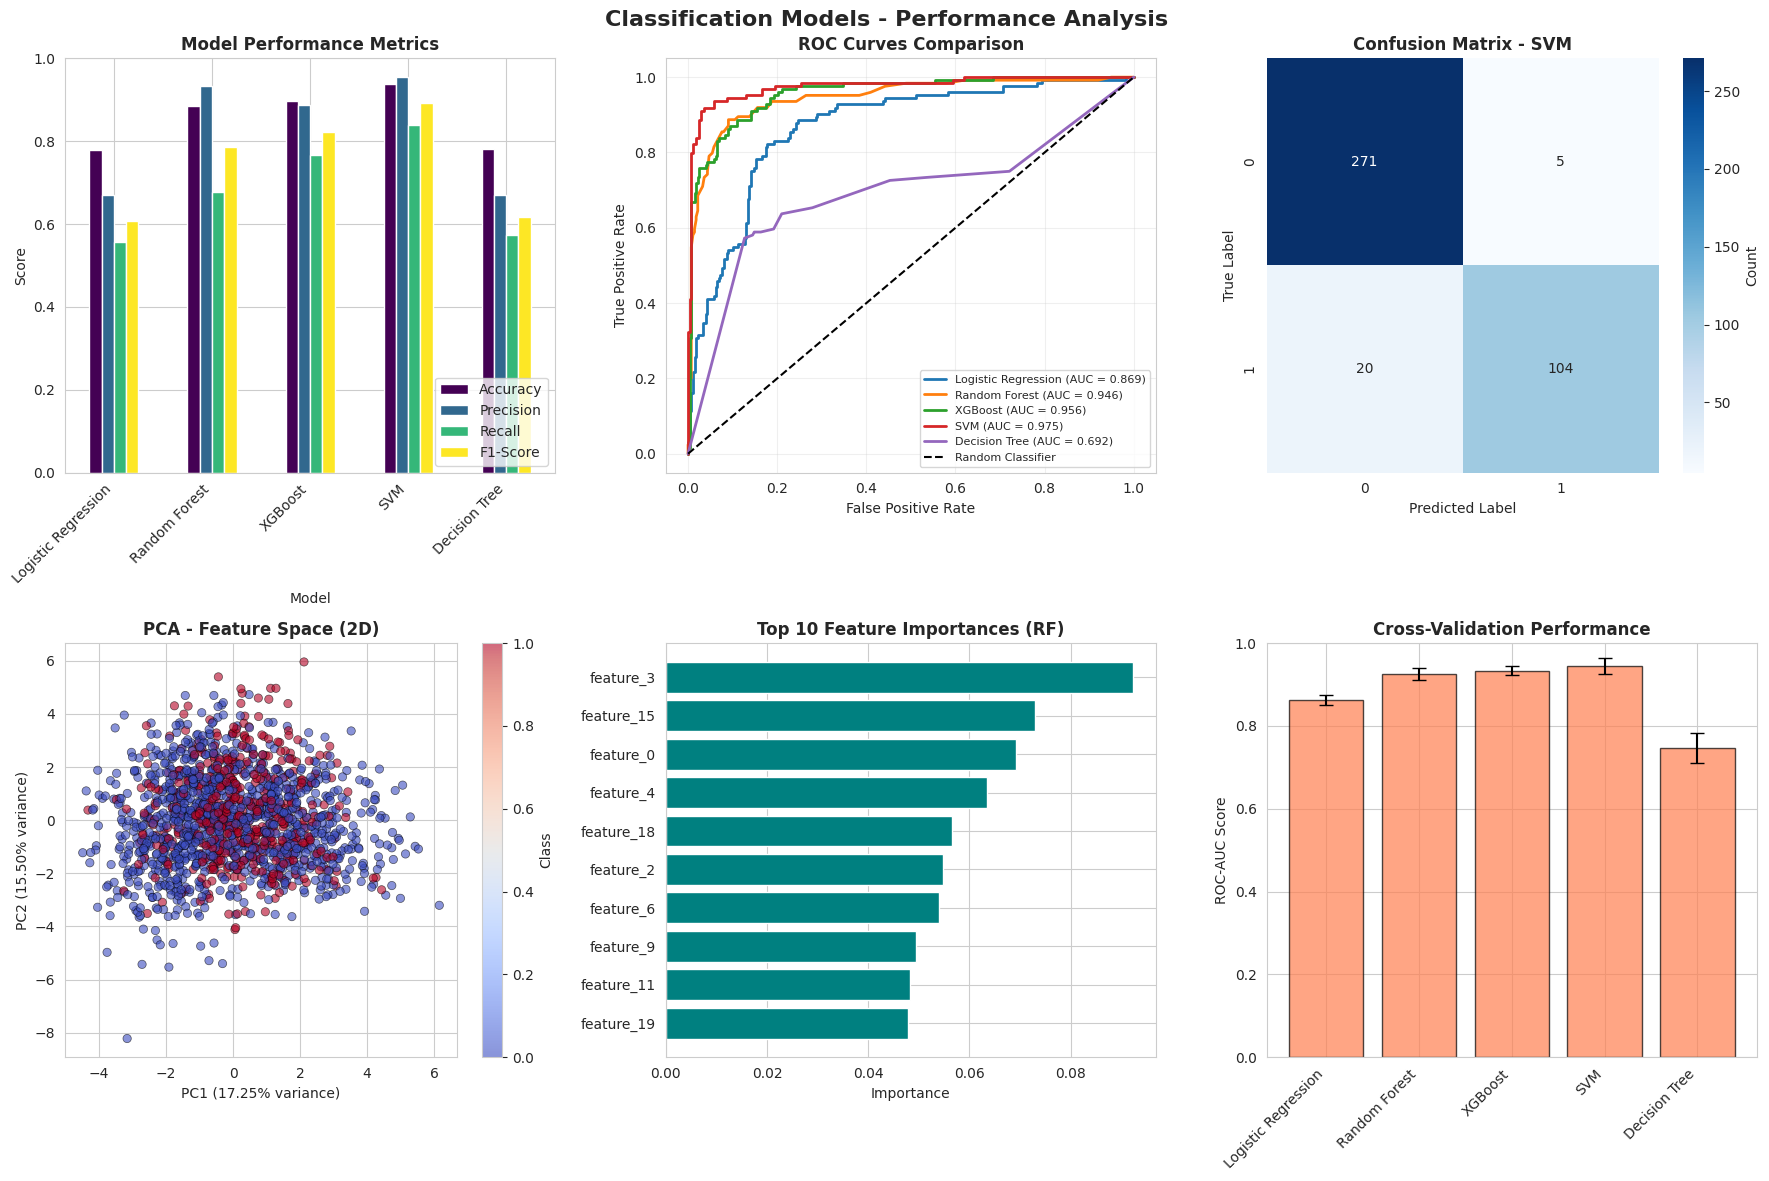

In [ ]:
# Visualization: Classification Performance Comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Classification Models - Performance Analysis', fontsize=16, fontweight='bold')

# 1. Model Comparison Bar Plot
ax = axes[0, 0]
metrics_df = pd.DataFrame({
    'Model': list(class_results.keys()),
    'Accuracy': [v['accuracy'] for v in class_results.values()],
    'Precision': [v['precision'] for v in class_results.values()],
    'Recall': [v['recall'] for v in class_results.values()],
    'F1-Score': [v['f1'] for v in class_results.values()]
})
metrics_df.set_index('Model').plot(kind='bar', ax=ax, colormap='viridis')
ax.set_title('Model Performance Metrics', fontweight='bold')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.set_ylim([0, 1])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. ROC Curves
ax = axes[0, 1]
for name, results in class_results.items():
    if results['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test_c, results['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves Comparison', fontweight='bold')
ax.legend(loc='lower right', fontsize=8)
ax.grid(True, alpha=0.3)

# 3. Best Model Confusion Matrix
best_model_name = max(class_results.items(), key=lambda x: x[1]['f1'])[0]
cm = confusion_matrix(y_test_c, class_results[best_model_name]['y_pred'])
ax = axes[0, 2]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar_kws={'label': 'Count'})
ax.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# 4. PCA Visualization
ax = axes[1, 0]
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_c,
                    cmap='coolwarm', alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_title('PCA - Feature Space (2D)', fontweight='bold')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, ax=ax, label='Class')

# 5. Feature Importance (Random Forest)
ax = axes[1, 1]
rf_model = classification_models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features
ax.barh(range(len(indices)), importances[indices], color='teal')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([feature_names[i] for i in indices])
ax.set_xlabel('Importance')
ax.set_title('Top 10 Feature Importances (RF)', fontweight='bold')

# 6. Cross-Validation Scores
ax = axes[1, 2]
cv_data = pd.DataFrame({
    'Model': list(class_results.keys()),
    'CV Mean': [v['cv_mean'] for v in class_results.values()],
    'CV Std': [v['cv_std'] for v in class_results.values()]
})
ax.bar(range(len(cv_data)), cv_data['CV Mean'], yerr=cv_data['CV Std'],
       capsize=5, color='coral', alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(cv_data)))
ax.set_xticklabels(cv_data['Model'], rotation=45, ha='right')
ax.set_ylabel('ROC-AUC Score')
ax.set_title('Cross-Validation Performance', fontweight='bold')
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [1]:
# ============================================================================
# PART 2: REGRESSION TASK
# ============================================================================

print("\n" + "=" * 80)
print("📈 REGRESSION TASK: Continuous Target Prediction")
print("=" * 80)


📈 REGRESSION TASK: Continuous Target Prediction


In [5]:
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=15,
    n_informative=10,
    noise=15,
    random_state=42
)

In [6]:
feature_names_reg = [f'feature_{i}' for i in range(X_reg.shape[1])]
df_reg = pd.DataFrame(X_reg, columns=feature_names_reg)
df_reg['target'] = y_reg

In [18]:
feature_names_reg

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14']

In [8]:
print(f"\nDataset shape: {df_reg.shape}")
print(f"Target statistics:\n{df_reg['target'].describe()}")


Dataset shape: (1000, 16)
Target statistics:
count    1000.000000
mean       -1.396344
std       166.630627
min      -507.592002
25%      -107.128801
50%         2.056629
75%       113.374099
max       446.397836
Name: target, dtype: float64


In [9]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [16]:
y_reg

array([ 1.50616826e+02, -1.10946056e+02, -1.70366978e+02,  9.38993857e+01,
        9.32308292e+01,  1.20277480e+01,  2.81790104e+02, -1.95311937e+02,
       -1.65740079e+02, -2.74634056e+02,  1.10459794e+02,  2.64395628e+01,
       -3.78179647e+02, -2.59273217e+02,  1.11689635e+02, -1.07499853e+02,
        2.15112560e+01,  1.18615931e+02,  4.87351087e+01, -9.91942956e+01,
       -1.04221002e+01, -1.44149161e+01, -1.04058037e+02,  6.84586470e+01,
       -2.02447108e+00, -1.26273225e+01, -2.06411407e+02,  1.53955845e+01,
       -1.22568259e+02, -2.28225266e+01, -4.93700667e+00,  1.69348074e+02,
       -3.59542236e+01,  1.26715681e+01,  2.49533957e+01,  1.37576391e+02,
        1.94827065e+02, -3.36644863e+02,  1.11663758e+02, -2.75794454e+02,
       -1.31813385e+02,  1.38058668e+02, -1.92713136e+02,  2.41084731e+02,
        2.65654116e+02, -8.86371743e+01, -4.09183441e+02,  1.20443338e+02,
        2.04746830e+02,  8.46514473e+01,  4.97309468e+01,  2.07476921e+01,
       -7.16169288e+01,  

In [19]:
# Feature scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

In [20]:
X_train_r_scaled

array([[-0.81155069, -0.12676412, -1.14780305, ..., -0.02305849,
        -1.52898781,  0.10360405],
       [-0.98784532,  0.62805487, -3.34489266, ..., -1.67144184,
         2.70703559, -1.04353408],
       [-2.24754489,  0.50816909, -0.18594039, ..., -0.96580321,
         0.3863798 ,  1.33234887],
       ...,
       [ 1.12520476,  0.47914073,  0.82605192, ...,  1.94101197,
         1.30314585,  0.02290674],
       [ 0.34114636,  0.26207134, -0.58071868, ..., -1.02194067,
        -0.426385  ,  1.28945933],
       [-1.88951576, -1.56256685, -1.50521776, ...,  0.75886142,
         0.26704364,  0.23661038]])

In [21]:
X_test_r_scaled

array([[-1.27432751, -0.51506924,  0.39717521, ..., -1.73781855,
        -0.93147234,  1.22137642],
       [-0.62172028,  0.03147905,  0.68124852, ...,  0.91629094,
        -0.24386642, -1.0472839 ],
       [ 1.15203066, -0.81837062,  0.86656875, ..., -1.44064649,
         0.63013405,  0.13757904],
       ...,
       [-1.03238353,  0.31441471, -0.86884685, ..., -0.50467861,
        -0.32922106,  0.64883888],
       [-0.98063632,  0.45752562,  0.91091589, ..., -0.14311956,
         2.13002147,  0.30668702],
       [ 0.99218275, -0.25761715, -0.29327278, ..., -1.11343116,
        -1.83537254,  0.06251792]])

In [22]:
regression_models = {
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

In [23]:
print("\n" + "=" * 80)
print("REGRESSION MODEL PERFORMANCE")
print("=" * 80)


REGRESSION MODEL PERFORMANCE


In [ ]:
reg_results = {}
for name, model in regression_models.items():
    # Cross-validation (negative MSE)
    cv_scores = -cross_val_score(model, X_train_r_scaled, y_train_r,
                                  cv=5, scoring='neg_mean_squared_error')

    # Train model
    model.fit(X_train_r_scaled, y_train_r)

    # Predictions
    y_pred = model.predict(X_test_r_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)

    reg_results[name] = {
        'cv_rmse_mean': np.sqrt(cv_scores.mean()),
        'cv_rmse_std': np.sqrt(cv_scores.std()),
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'y_pred': y_pred
    }

    print(f"\n{name}:")
    print(f"  CV RMSE:    {np.sqrt(cv_scores.mean()):.4f} (+/- {np.sqrt(cv_scores.std()):.4f})")
    print(f"  Test RMSE:  {rmse:.4f}")
    print(f"  Test MAE:   {mae:.4f}")
    print(f"  R² Score:   {r2:.4f}")

In [ ]:
# Visualization: Regression Performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

# 1. Model Comparison
ax = axes[0, 0]
reg_metrics_df = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'RMSE': [v['rmse'] for v in reg_results.values()],
    'MAE': [v['mae'] for v in reg_results.values()]
})
reg_metrics_df.set_index('Model').plot(kind='bar', ax=ax, color=['steelblue', 'coral'])
ax.set_title('Model Error Metrics', fontweight='bold')
ax.set_ylabel('Error')
ax.legend(loc='upper right')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. R² Score Comparison
ax = axes[0, 1]
r2_scores = [v['r2'] for v in reg_results.values()]
colors = ['green' if r2 > 0.8 else 'orange' if r2 > 0.6 else 'red' for r2 in r2_scores]
ax.barh(list(reg_results.keys()), r2_scores, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('R² Score')
ax.set_title('R² Score Comparison', fontweight='bold')
ax.set_xlim([0, 1])
ax.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Good (>0.8)')
ax.axvline(x=0.6, color='orange', linestyle='--', alpha=0.5, label='Fair (>0.6)')
ax.legend()

# 3. Best Model Prediction vs Actual
best_reg_model = max(reg_results.items(), key=lambda x: x[1]['r2'])[0]
ax = axes[0, 2]
ax.scatter(y_test_r, reg_results[best_reg_model]['y_pred'],
           alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
ax.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()],
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title(f'Predictions vs Actual - {best_reg_model}', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Residual Plot
ax = axes[1, 0]
residuals = y_test_r - reg_results[best_reg_model]['y_pred']
ax.scatter(reg_results[best_reg_model]['y_pred'], residuals,
           alpha=0.6, edgecolors='k', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title(f'Residual Plot - {best_reg_model}', fontweight='bold')
ax.grid(True, alpha=0.3)

# 5. Cross-Validation Performance
ax = axes[1, 1]
cv_data_reg = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'CV RMSE': [v['cv_rmse_mean'] for v in reg_results.values()],
    'CV Std': [v['cv_rmse_std'] for v in reg_results.values()]
})
ax.bar(range(len(cv_data_reg)), cv_data_reg['CV RMSE'],
       yerr=cv_data_reg['CV Std'], capsize=5, color='skyblue',
       alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(cv_data_reg)))
ax.set_xticklabels(cv_data_reg['Model'], rotation=45, ha='right')
ax.set_ylabel('RMSE')
ax.set_title('Cross-Validation RMSE', fontweight='bold')

# 6. Feature Importance (if available)
ax = axes[1, 2]
if hasattr(regression_models['Random Forest'], 'feature_importances_'):
    rf_reg = regression_models['Random Forest']
    importances_reg = rf_reg.feature_importances_
    indices_reg = np.argsort(importances_reg)[-10:]
    ax.barh(range(len(indices_reg)), importances_reg[indices_reg], color='purple', alpha=0.7)
    ax.set_yticks(range(len(indices_reg)))
    ax.set_yticklabels([feature_names_reg[i] for i in indices_reg])
    ax.set_xlabel('Importance')
    ax.set_title('Top 10 Feature Importances (RF)', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("\n" + "=" * 80)
print("✨ SUMMARY")
print("=" * 80)
print(f"\n🏆 Best Classification Model: {best_model_name}")
print(f"   F1-Score: {class_results[best_model_name]['f1']:.4f}")
print(f"\n🏆 Best Regression Model: {best_reg_model}")
print(f"   R² Score: {reg_results[best_reg_model]['r2']:.4f}")
print("\n" + "=" * 80)
print("🎓 Pipeline completed successfully!")
print("=" * 80)

In [ ]:
# ============================================================================
# PART 2: REGRESSION TASK
# ============================================================================


In [ ]:
print("\n" + "=" * 80)
print("📈 REGRESSION TASK: Continuous Target Prediction")
print("=" * 80)

In [ ]:
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=15,
    n_informative=10,
    noise=15,
    random_state=42
)

In [ ]:
# Create DataFrame
feature_names_reg = [f'feature_{i}' for i in range(X_reg.shape[1])]
df_reg = pd.DataFrame(X_reg, columns=feature_names_reg)
df_reg['target'] = y_reg


In [ ]:
print(f"\nDataset shape: {df_reg.shape}")
print(f"Target statistics:\n{df_reg['target'].describe()}")

In [ ]:
# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [ ]:

# Feature scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

In [24]:
regression_models = {
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Lasso': Lasso(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

In [25]:
# Train and evaluate regression models
print("\n" + "=" * 80)
print("📊 REGRESSION MODEL PERFORMANCE")
print("=" * 80)


📊 REGRESSION MODEL PERFORMANCE


In [26]:
reg_results = {}
for name, model in regression_models.items():
    # Cross-validation (negative MSE)
    cv_scores = -cross_val_score(model, X_train_r_scaled, y_train_r,
                                  cv=5, scoring='neg_mean_squared_error')

    # Train model
    model.fit(X_train_r_scaled, y_train_r)

    # Predictions
    y_pred = model.predict(X_test_r_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)

    reg_results[name] = {
        'cv_rmse_mean': np.sqrt(cv_scores.mean()),
        'cv_rmse_std': np.sqrt(cv_scores.std()),
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'y_pred': y_pred
    }

    print(f"\n{name}:")
    print(f"  CV RMSE:    {np.sqrt(cv_scores.mean()):.4f} (+/- {np.sqrt(cv_scores.std()):.4f})")
    print(f"  Test RMSE:  {rmse:.4f}")
    print(f"  Test MAE:   {mae:.4f}")
    print(f"  R² Score:   {r2:.4f}")


Ridge:
  CV RMSE:    15.4926 (+/- 6.2890)
  Test RMSE:  15.8615
  Test MAE:   12.3392
  R² Score:   0.9894

Lasso:
  CV RMSE:    15.7311 (+/- 6.3552)
  Test RMSE:  16.0419
  Test MAE:   12.4776
  R² Score:   0.9892

Random Forest:
  CV RMSE:    75.6836 (+/- 26.0983)
  Test RMSE:  66.3598
  Test MAE:   52.8170
  R² Score:   0.8150

XGBoost:
  CV RMSE:    69.1982 (+/- 23.6584)
  Test RMSE:  58.6072
  Test MAE:   46.6115
  R² Score:   0.8557

Gradient Boosting:
  CV RMSE:    51.5014 (+/- 22.6651)
  Test RMSE:  45.2447
  Test MAE:   37.4933
  R² Score:   0.9140

SVR:
  CV RMSE:    159.7545 (+/- 46.9908)
  Test RMSE:  145.7195
  Test MAE:   116.1844
  R² Score:   0.1081


Text(0.5, 0.98, 'Regression Models - Performance Analysis')

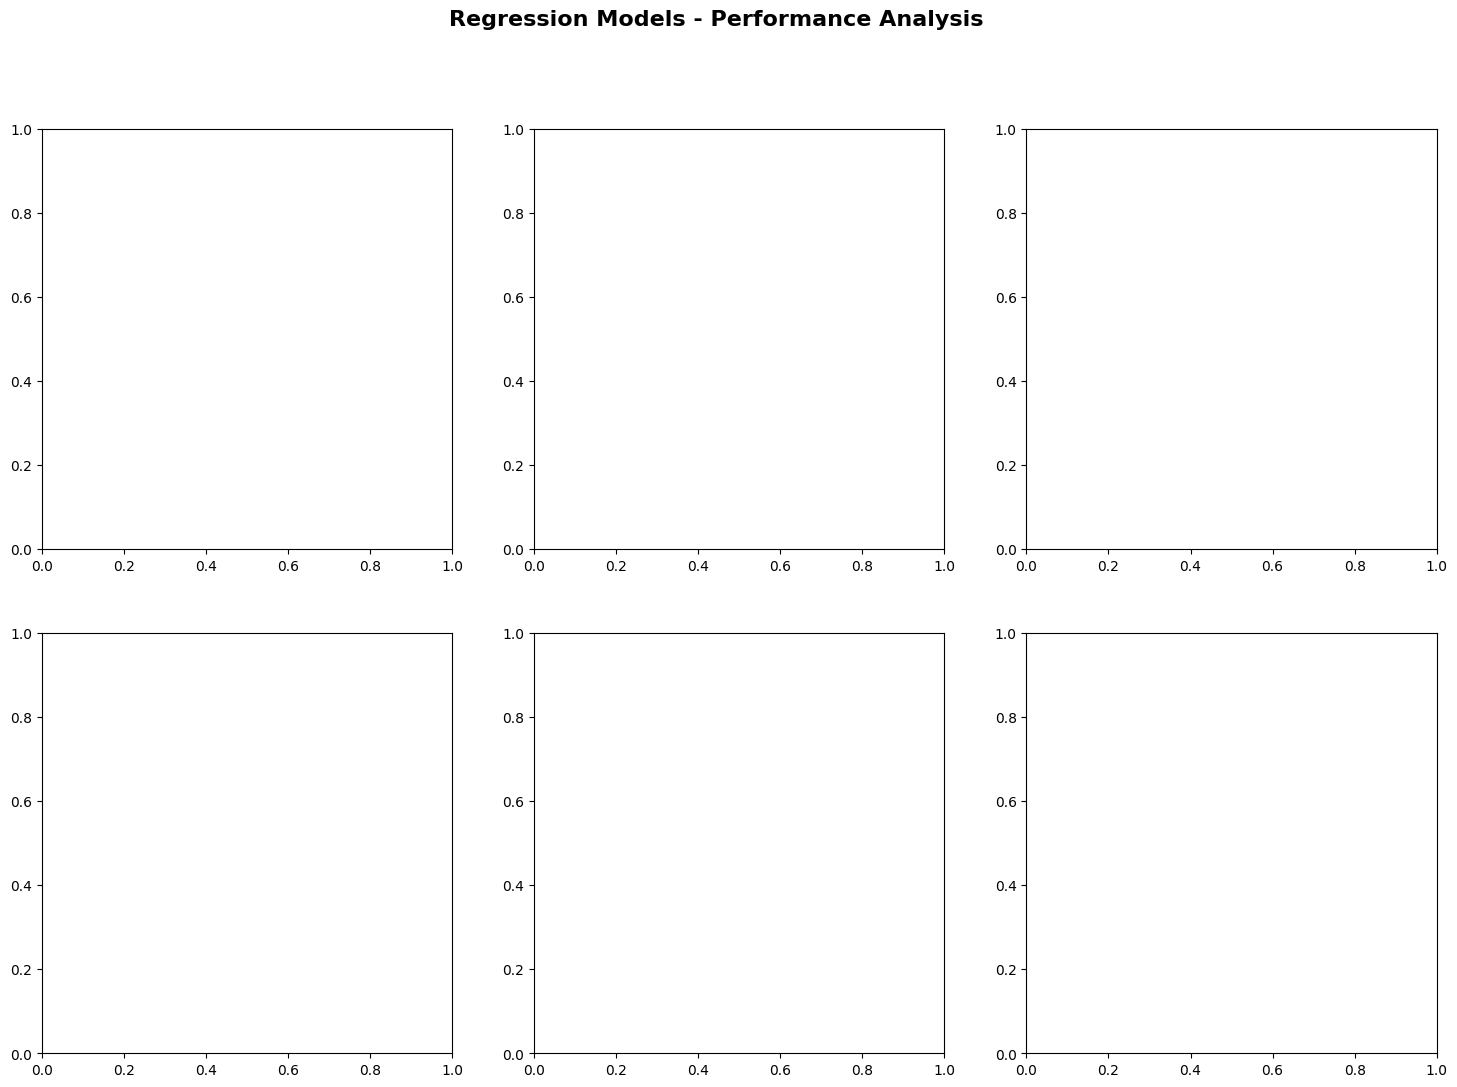

In [27]:
# Visualization: Regression Performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

# # 1. Model Comparison
# ax = axes[0, 0]
# reg_metrics_df = pd.DataFrame({
#     'Model': list(reg_results.keys()),
#     'RMSE': [v['rmse'] for v in reg_results.values()],
#     'MAE': [v['mae'] for v in reg_results.values()]
# })
# reg_metrics_df.set_index('Model').plot(kind='bar', ax=ax, color=['steelblue', 'coral'])
# ax.set_title('Model Error Metrics', fontweight='bold')
# ax.set_ylabel('Error')
# ax.legend(loc='upper right')
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# # 2. R² Score Comparison
# ax = axes[0, 1]
# r2_scores = [v['r2'] for v in reg_results.values()]
# colors = ['green' if r2 > 0.8 else 'orange' if r2 > 0.6 else 'red' for r2 in r2_scores]
# ax.barh(list(reg_results.keys()), r2_scores, color=colors, alpha=0.7, edgecolor='black')
# ax.set_xlabel('R² Score')
# ax.set_title('R² Score Comparison', fontweight='bold')
# ax.set_xlim([0, 1])
# ax.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Good (>0.8)')
# ax.axvline(x=0.6, color='orange', linestyle='--', alpha=0.5, label='Fair (>0.6)')
# ax.legend()

# # 3. Best Model Prediction vs Actual
# best_reg_model = max(reg_results.items(), key=lambda x: x[1]['r2'])[0]
# ax = axes[0, 2]
# ax.scatter(y_test_r, reg_results[best_reg_model]['y_pred'],
#            alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
# ax.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()],
#         'r--', lw=2, label='Perfect Prediction')
# ax.set_xlabel('Actual Values')
# ax.set_ylabel('Predicted Values')
# ax.set_title(f'Predictions vs Actual - {best_reg_model}', fontweight='bold')
# ax.legend()
# ax.grid(True, alpha=0.3)

# # 4. Residual Plot
# ax = axes[1, 0]
# residuals = y_test_r - reg_results[best_reg_model]['y_pred']
# ax.scatter(reg_results[best_reg_model]['y_pred'], residuals,
#            alpha=0.6, edgecolors='k', linewidth=0.5)
# ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
# ax.set_xlabel('Predicted Values')
# ax.set_ylabel('Residuals')
# ax.set_title(f'Residual Plot - {best_reg_model}', fontweight='bold')
# ax.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Cross-Validation RMSE')

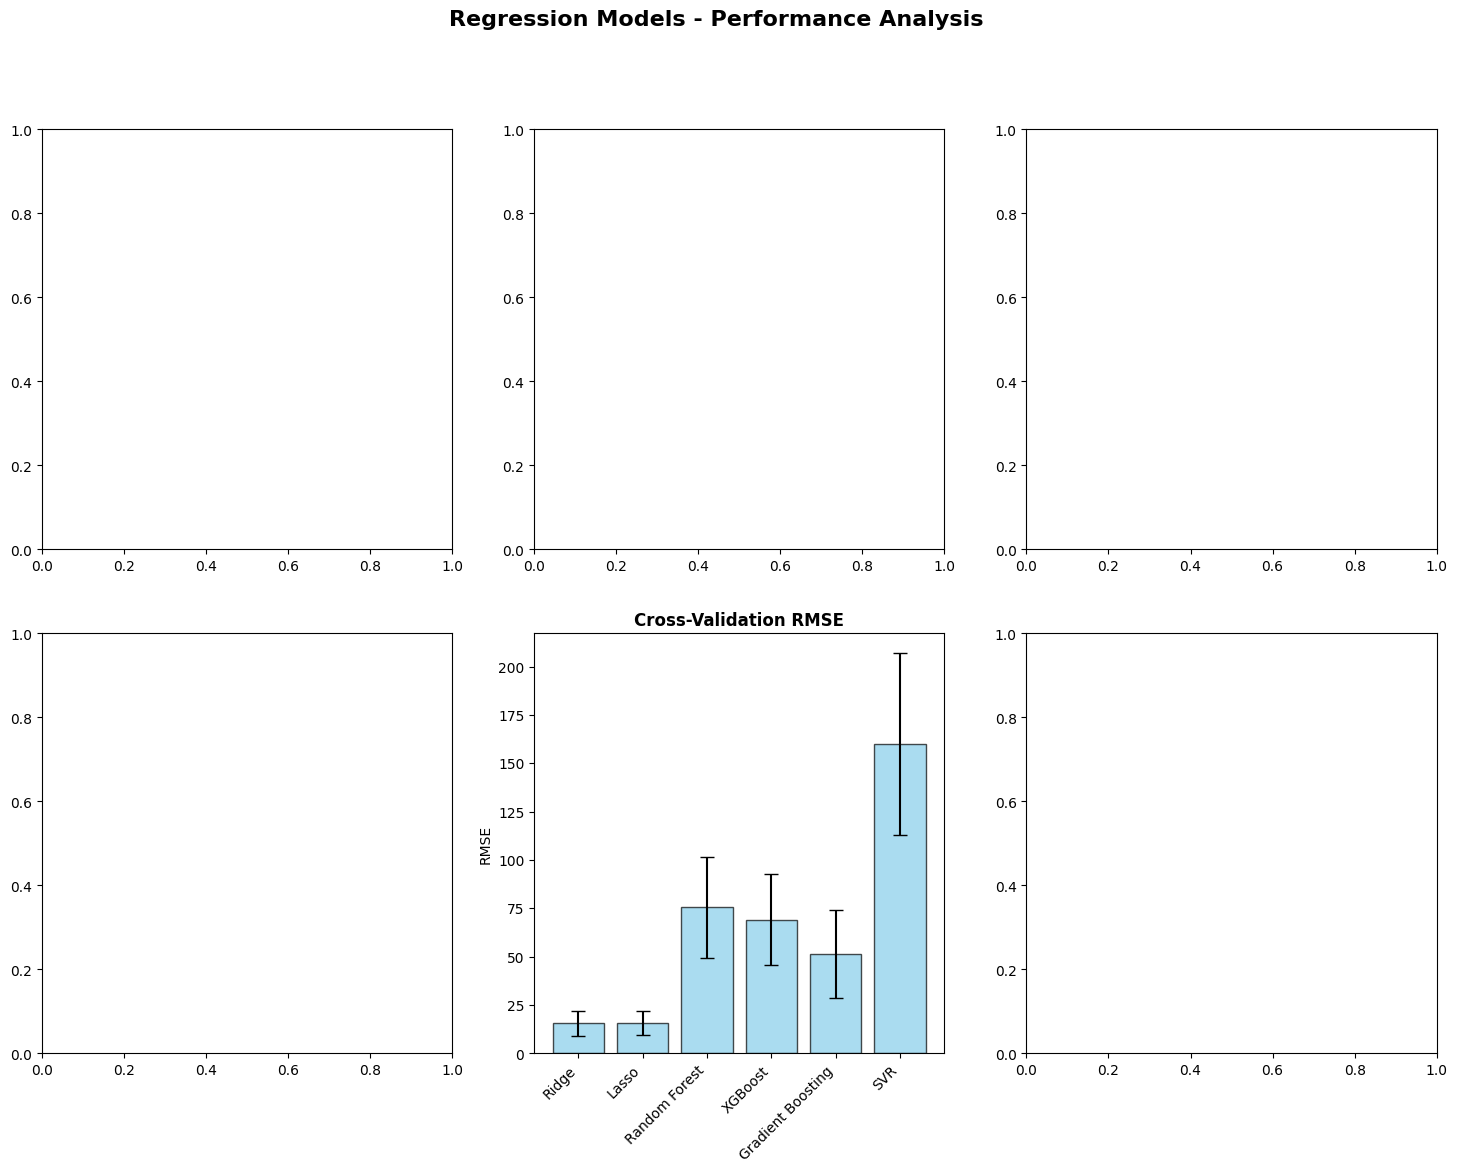

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

# 5. Cross-Validation Performance
ax = axes[1, 1]
cv_data_reg = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'CV RMSE': [v['cv_rmse_mean'] for v in reg_results.values()],
    'CV Std': [v['cv_rmse_std'] for v in reg_results.values()]
})
ax.bar(range(len(cv_data_reg)), cv_data_reg['CV RMSE'],
       yerr=cv_data_reg['CV Std'], capsize=5, color='skyblue',
       alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(cv_data_reg)))
ax.set_xticklabels(cv_data_reg['Model'], rotation=45, ha='right')
ax.set_ylabel('RMSE')
ax.set_title('Cross-Validation RMSE', fontweight='bold')

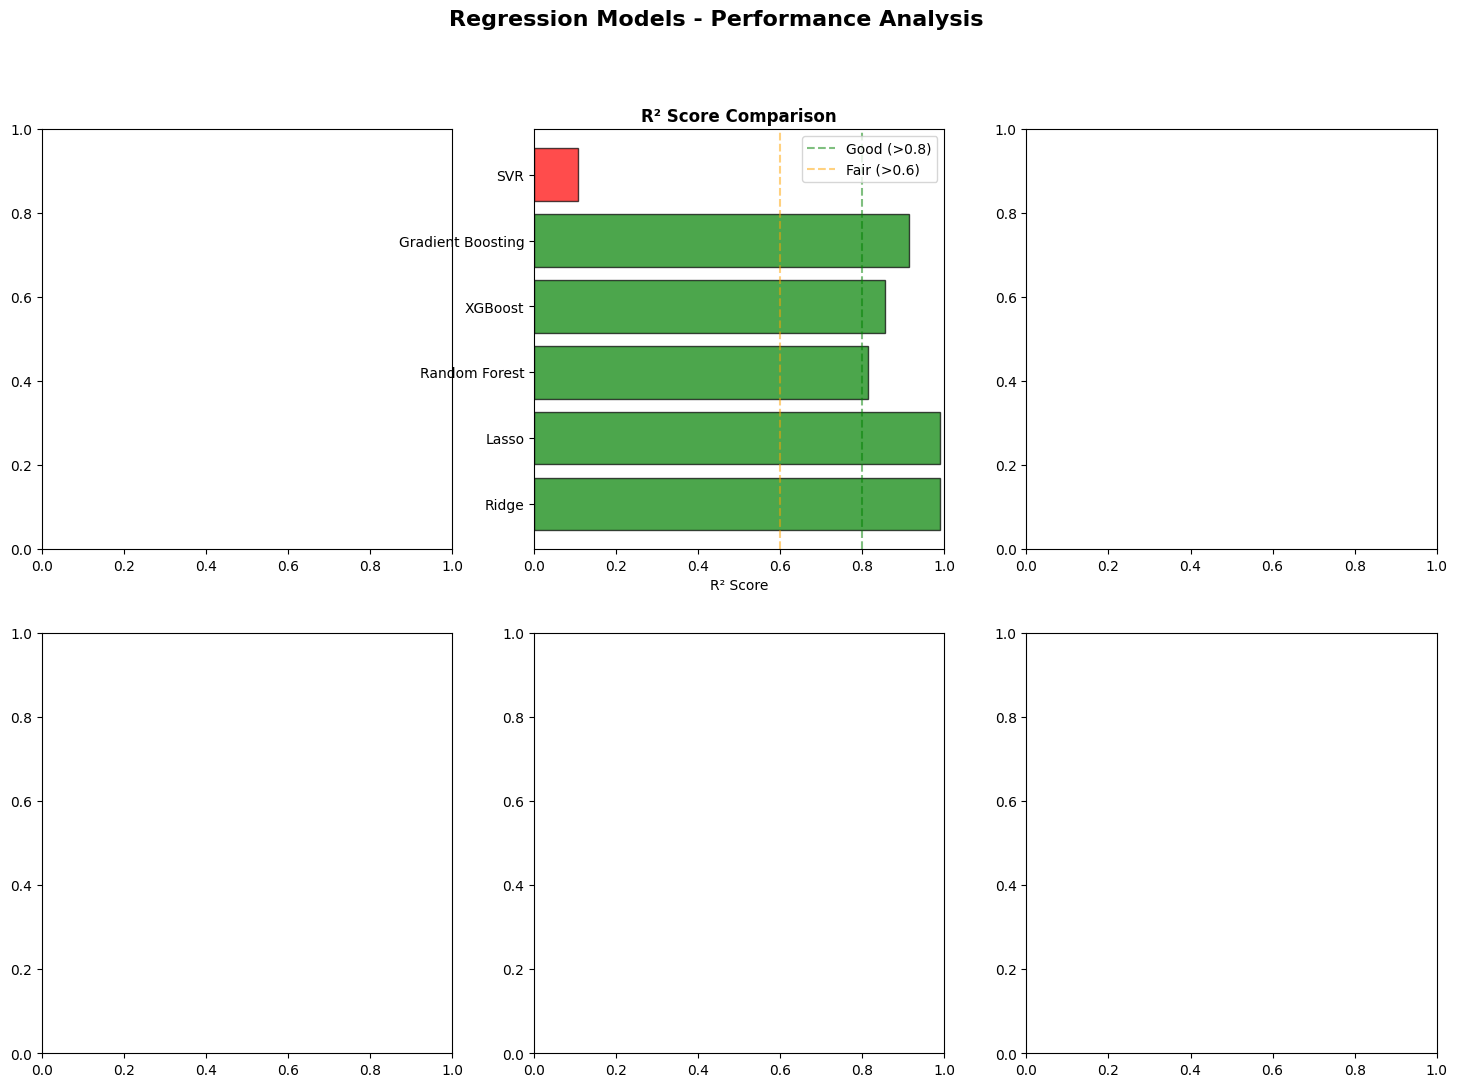

In [31]:
# 2. R² Score Comparison

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')


ax = axes[0, 1]
r2_scores = [v['r2'] for v in reg_results.values()]
colors = ['green' if r2 > 0.8 else 'orange' if r2 > 0.6 else 'red' for r2 in r2_scores]
ax.barh(list(reg_results.keys()), r2_scores, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('R² Score')
ax.set_title('R² Score Comparison', fontweight='bold')
ax.set_xlim([0, 1])
ax.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, label='Good (>0.8)')
ax.axvline(x=0.6, color='orange', linestyle='--', alpha=0.5, label='Fair (>0.6)')
ax.legend()

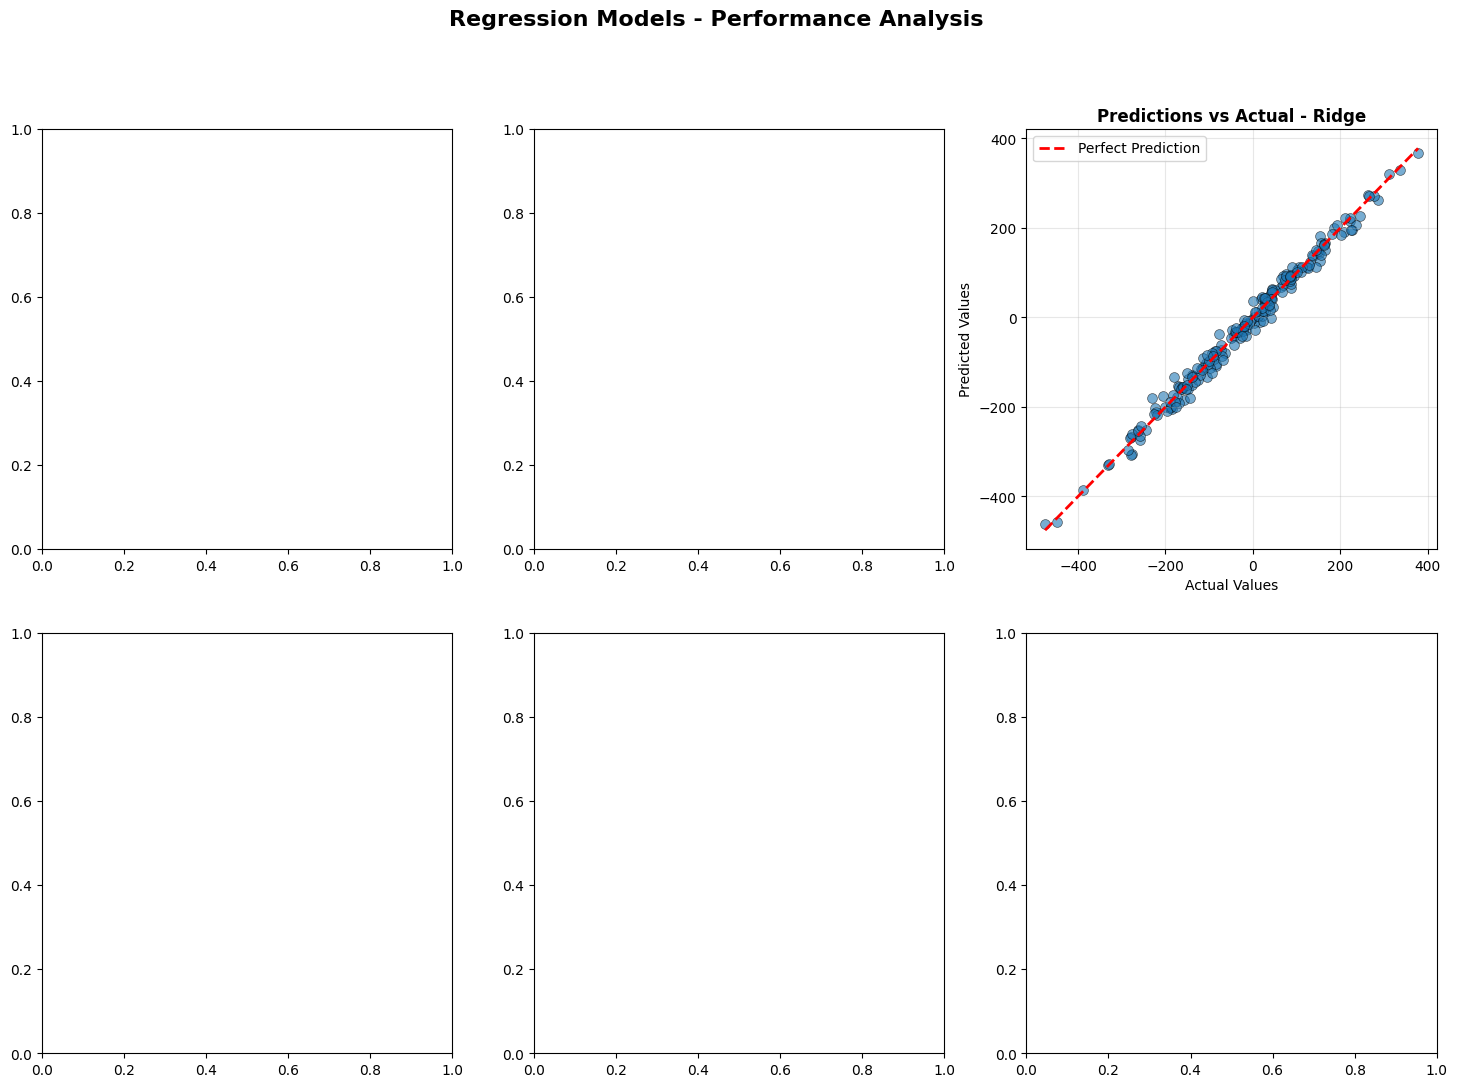

In [35]:
# 3. Best Model Prediction vs Actual
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

best_reg_model = max(reg_results.items(), key=lambda x: x[1]['r2'])[0]
ax = axes[0, 2]
ax.scatter(y_test_r, reg_results[best_reg_model]['y_pred'],
           alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
ax.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()],
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title(f'Predictions vs Actual - {best_reg_model}', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

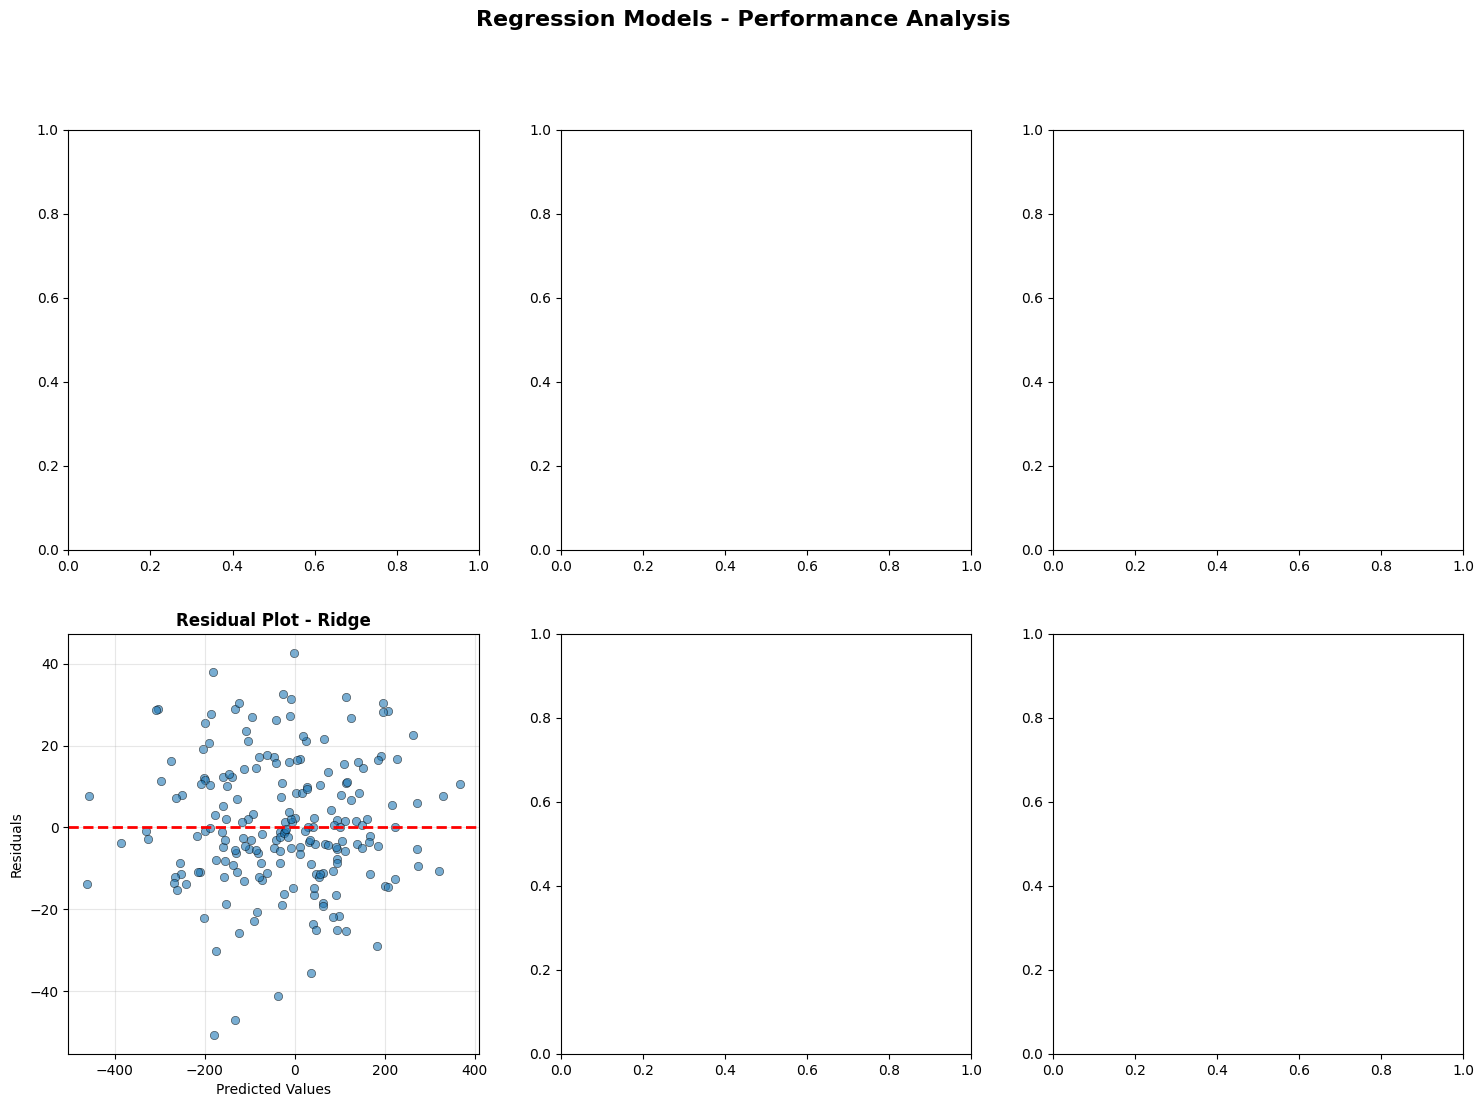

In [38]:
# 4. Residual Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

ax = axes[1, 0]
residuals = y_test_r - reg_results[best_reg_model]['y_pred']
ax.scatter(reg_results[best_reg_model]['y_pred'], residuals,
           alpha=0.6, edgecolors='k', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title(f'Residual Plot - {best_reg_model}', fontweight='bold')
ax.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Cross-Validation RMSE')

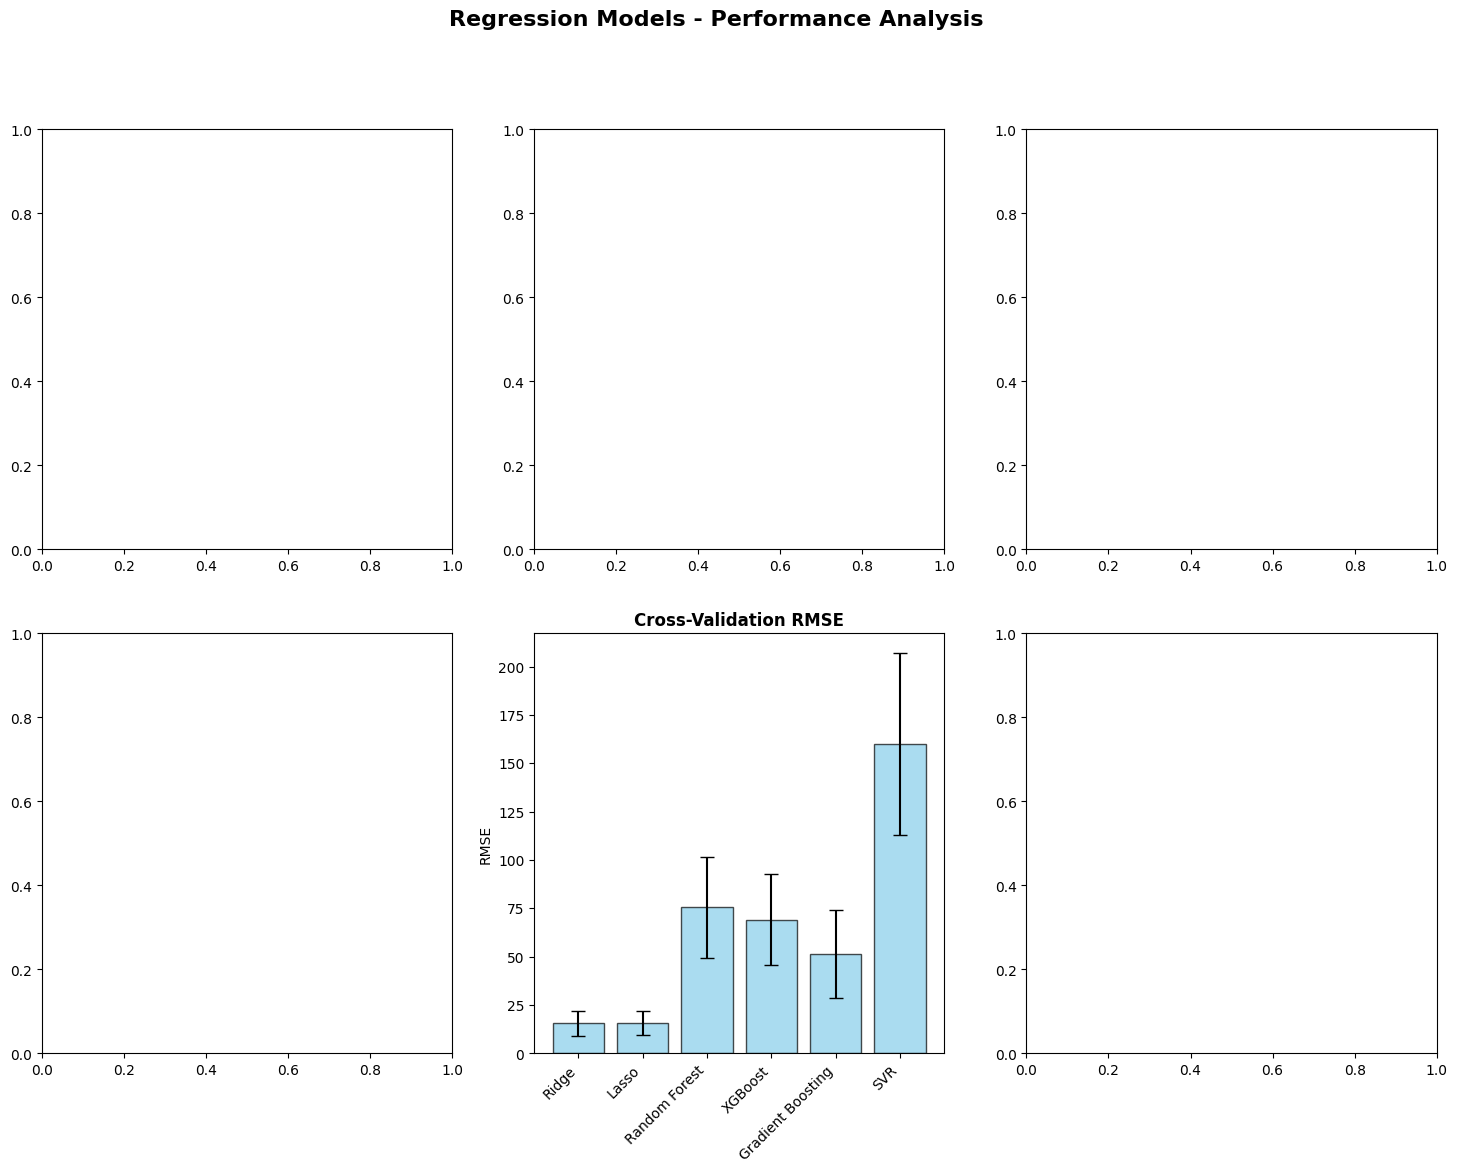

In [39]:
# 5. Cross-Validation Performance

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

ax = axes[1, 1]
cv_data_reg = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'CV RMSE': [v['cv_rmse_mean'] for v in reg_results.values()],
    'CV Std': [v['cv_rmse_std'] for v in reg_results.values()]
})
ax.bar(range(len(cv_data_reg)), cv_data_reg['CV RMSE'],
       yerr=cv_data_reg['CV Std'], capsize=5, color='skyblue',
       alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(cv_data_reg)))
ax.set_xticklabels(cv_data_reg['Model'], rotation=45, ha='right')
ax.set_ylabel('RMSE')
ax.set_title('Cross-Validation RMSE', fontweight='bold')

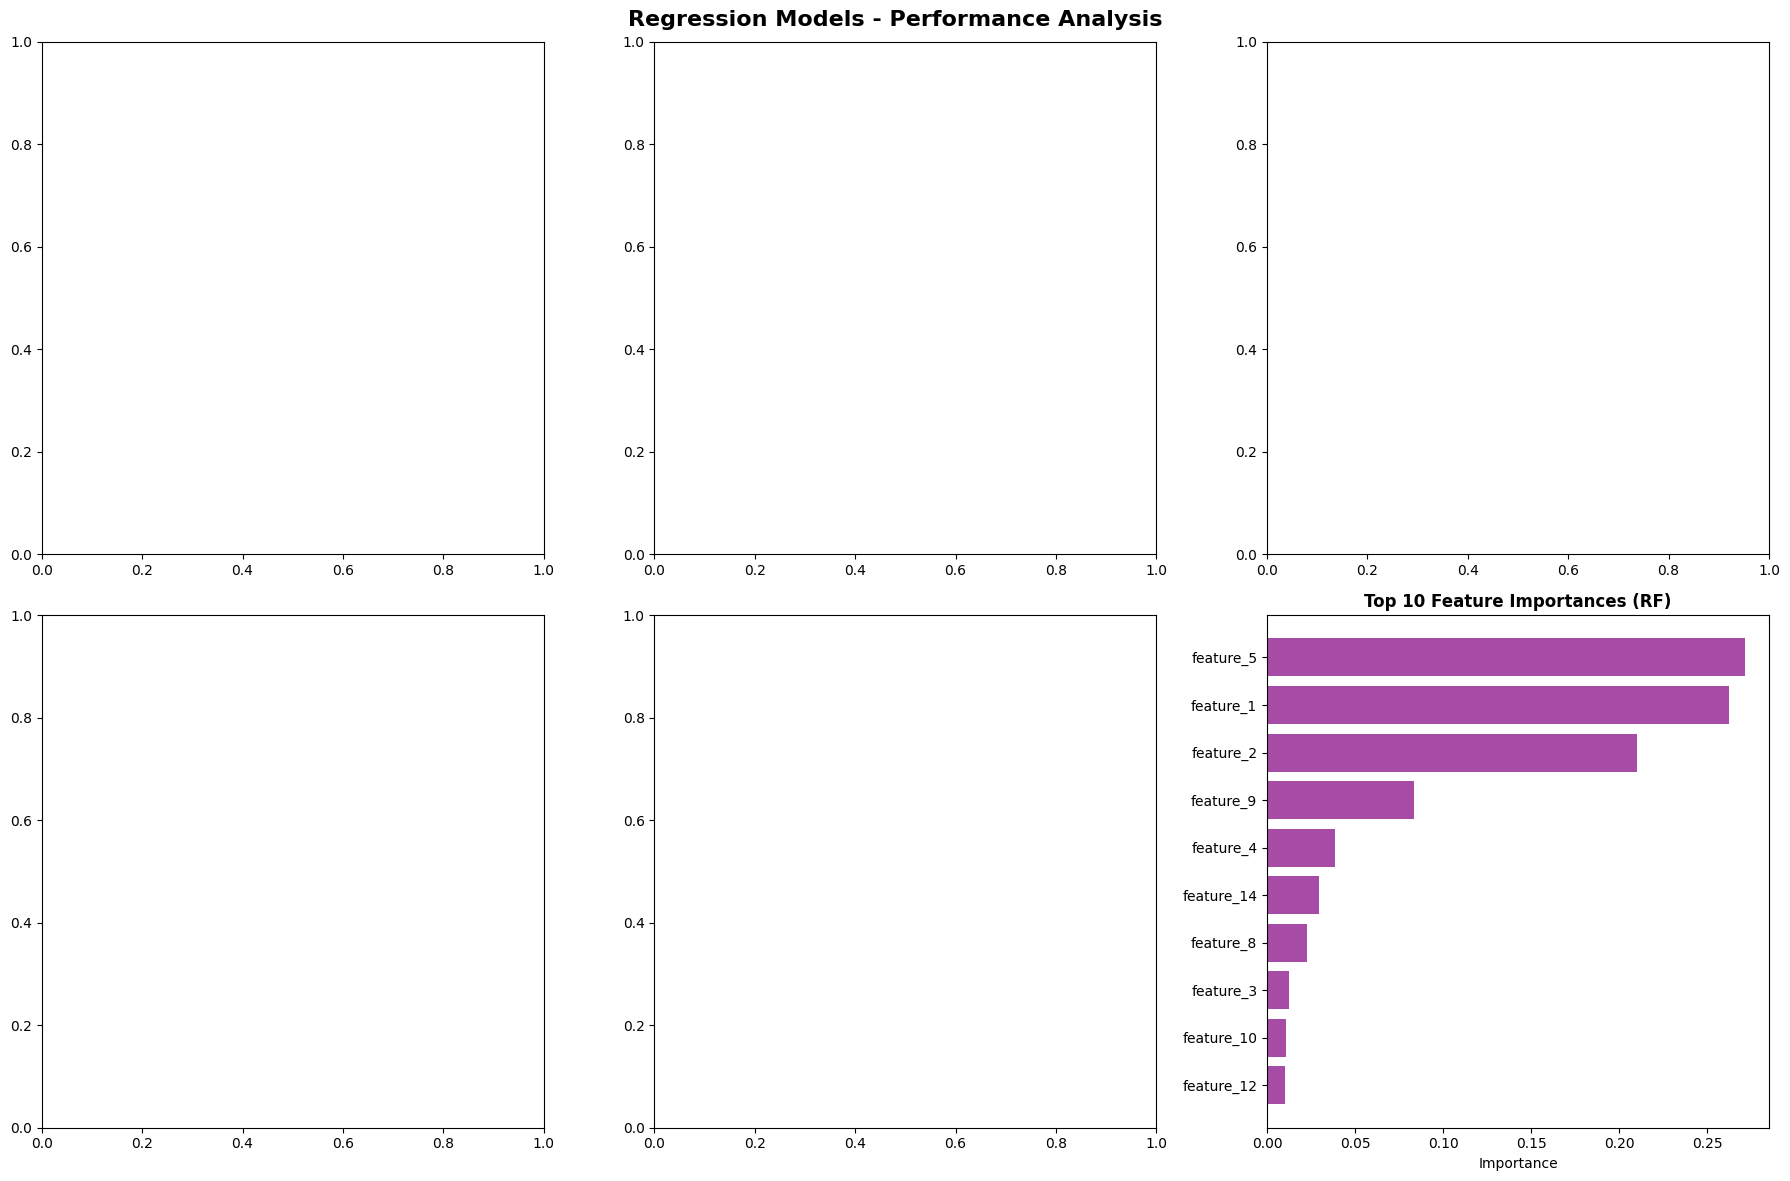

In [40]:
#6. Feature Importance (if available)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Models - Performance Analysis', fontsize=16, fontweight='bold')

ax = axes[1, 2]
if hasattr(regression_models['Random Forest'], 'feature_importances_'):
    rf_reg = regression_models['Random Forest']
    importances_reg = rf_reg.feature_importances_
    indices_reg = np.argsort(importances_reg)[-10:]
    ax.barh(range(len(indices_reg)), importances_reg[indices_reg], color='purple', alpha=0.7)
    ax.set_yticks(range(len(indices_reg)))
    ax.set_yticklabels([feature_names_reg[i] for i in indices_reg])
    ax.set_xlabel('Importance')
    ax.set_title('Top 10 Feature Importances (RF)', fontweight='bold')

plt.tight_layout()
plt.show()


In [43]:
# Summary
print("\n" + "=" * 80)
print("✨ SUMMARY")
print("=" * 80)
print(f"\n🏆 Best Classification Model: {best_model_name}")
print(f"   F1-Score: {class_results[best_model_name]['f1']:.4f}")
print(f"\n🏆 Best Regression Model: {best_reg_model}")
print(f"   R² Score: {reg_results[best_reg_model]['r2']:.4f}")
print("\n" + "=" * 80)
print("🎓 Pipeline completed successfully!")
print("=" * 80)


✨ SUMMARY


NameError: name 'best_model_name' is not defined